In [1]:
# importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/(ongoing)Goodreads Analysis and Recommending Books/books.csv',error_bad_lines = False)

df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
# exploratory data analysis and visualization

In [4]:
# info of dataset
print('Information of Dataset')
print('*'*40)
df.info()


Information of Dataset
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
# shape of dataset
print('shape of dataset')
print('*'*20)
print(f'rows : {df.shape[0]}')
print(f'columns : {df.shape[1]}')

shape of dataset
********************
rows : 11123
columns : 12


In [6]:
# statistical info of dataset
print('statistical info of dataset')
print('*'*20)
df.describe().T

statistical info of dataset
********************


,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


In [7]:
# nan values
print('Missing values\n')
df.isna().sum()

Missing values



bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [8]:
# columns in dataset
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [9]:
# dropping unnecessary columns
df.drop(['bookID','isbn','isbn13'], axis=1, inplace=True)


In [10]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [11]:
# unique values and number of unique values in columns
cols=['title','authors','language_code','publisher']
for vars in cols:
  print(f'number of unique values in {vars} : {df[vars].nunique()}\n')
  print(f'unique values in {vars} : {df[vars].unique()}\n')
  print('*'*50)

number of unique values in title : 10348

unique values in title : ['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']

**************************************************
number of unique values in authors : 6639

unique values in authors : ['J.K. Rowling/Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'C.S. Lewis/Ana Falcão Bastos'
 'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos'
 'William T. Vollmann/Larry McCaffery/Michael Hemmingson']

**************************************************
number of unique values in language_code : 27

unique values in language_code : ['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']

***********************

In [12]:
df['authors']=df['authors'].replace('J.K. Rowling/Mary GrandPré' ,'J.K. Rowling')

In [13]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [14]:
# count of titles
plt.figure(figsize=(20,10))
book_cnt=df['title'].value_counts()[:20]
book_cnt

The Brothers Karamazov          9
The Iliad                       9
'Salem's Lot                    8
Gulliver's Travels              8
Anna Karenina                   8
The Odyssey                     8
The Picture of Dorian Gray      7
A Midsummer Night's Dream       7
Collected Stories               6
Romeo and Juliet                6
Sense and Sensibility           6
The Great Gatsby                6
Macbeth                         6
Robinson Crusoe                 6
The Scarlet Letter              6
Treasure Island                 6
The Secret Garden               6
Jane Eyre                       6
The Histories                   6
The Enemy (Jack Reacher  #8)    5
Name: title, dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'count')

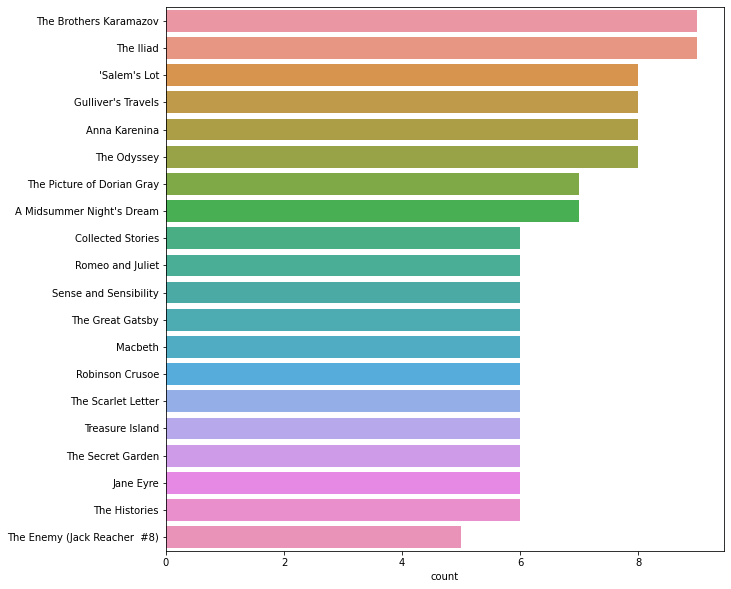

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x=book_cnt, y=book_cnt.index)
plt.xlabel('count')

In [16]:
# count of authors
plt.figure(figsize=(20,10))
AUT=df['authors'].value_counts()[:20]
AUT

Stephen King                   40
P.G. Wodehouse                 40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Sandra Brown                   29
Mercedes Lackey                29
Dick Francis                   28
Laurell K. Hamilton            23
Margaret Weis/Tracy Hickman    23
Terry Pratchett                23
James Patterson                23
Gordon Korman                  22
Bill Bryson                    21
Janet Evanovich                21
Alan Dean Foster               21
Dan Simmons                    21
Dean Koontz                    20
Gabriel García Márquez         20
Name: authors, dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'count')

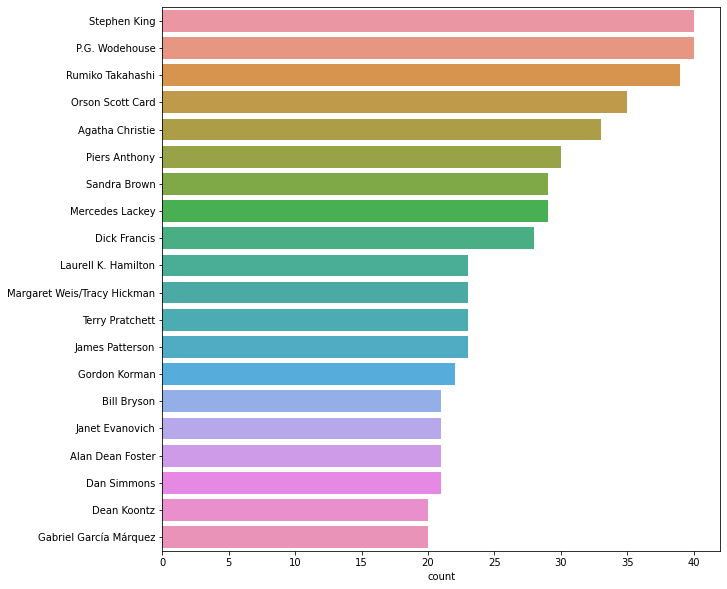

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x=AUT, y=AUT.index)
plt.xlabel('count')

In [18]:
# counting of lang
plt.figure(figsize=(20,10))
lang=df['language_code'].value_counts()[:5]
lang

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
Name: language_code, dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'count')

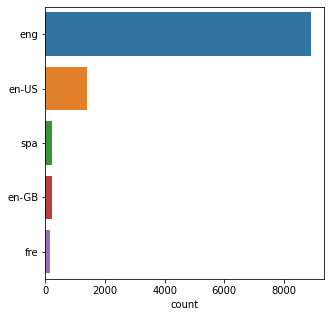

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x=lang, y=lang.index)
plt.xlabel('count')

In [20]:
# counting of publishers
plt.figure(figsize=(20,10))
publish=df['publisher'].value_counts()[:20]
publish

Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
HarperCollins                   112
Harper Perennial                112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Scribner                         73
Oxford University Press          73
W. W. Norton  Company            68
Name: publisher, dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'count')

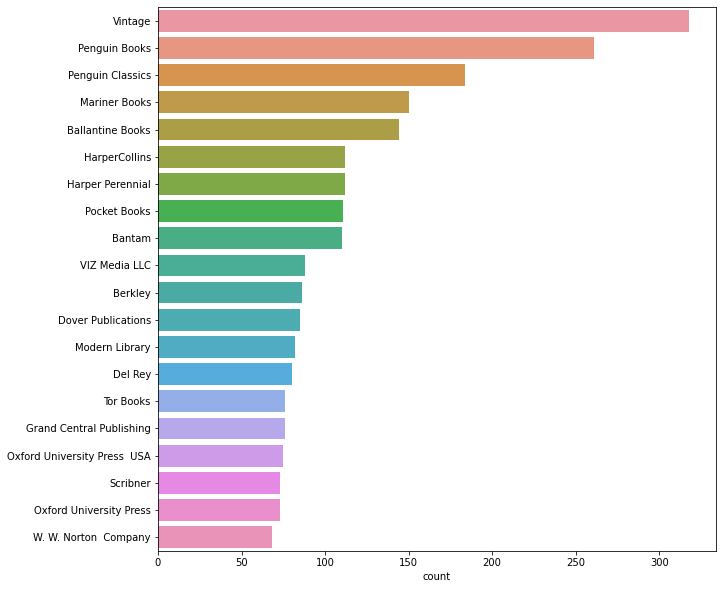

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=publish, y=publish.index)
plt.xlabel('count')

In [22]:
# top 10 books with most rating


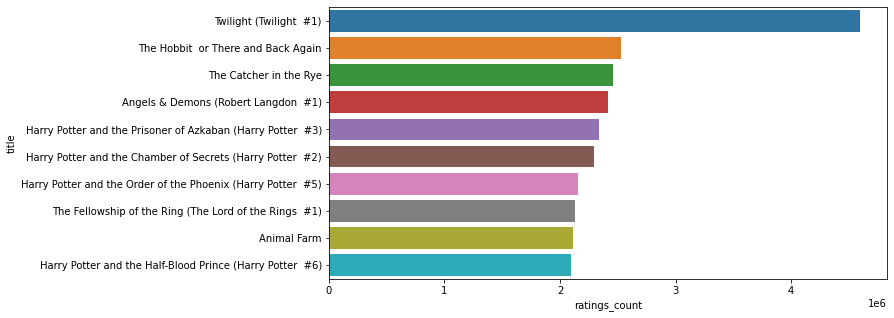

In [23]:
most_rated=df.sort_values('ratings_count', ascending=False).set_index('title')[:10]
most_rated
plt.figure(figsize=(10,5))
sns.barplot(x=most_rated['ratings_count'], y=most_rated.index)

In [24]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [25]:
df['year']=df['publication_date'].apply(lambda x: x.split('/')[-1])

In [26]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [27]:
# top 10 authors with most number of books
author=df['authors'].value_counts().sort_values(ascending=False)
author[:10]

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64

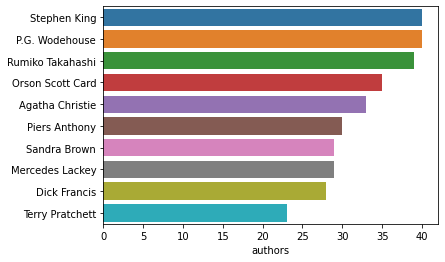

In [28]:
sns.barplot(x=author[:10], y=author.index[:10])

In [29]:
# english language books
eng_lang=df[df['language_code']=='eng']
eng_lang

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004
...,...,...,...,...,...,...,...,...,...,...
11103,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,eng,90,7,0,9/15/1995,BBC Audiobooks,1995
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2004
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,1988
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,1993


Text(0.5, 1.0, 'Avg rating during course of years')

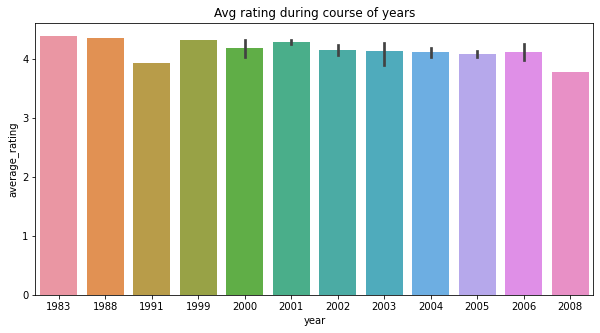

In [30]:
# distribution of ratings along the years for PG Wodehouse
aut_wode=df[df['authors']=='P.G. Wodehouse']
plt.figure(figsize=(10,5))
sns.barplot(x=aut_wode['year'].sort_values(), y=aut_wode['average_rating'])
plt.title('Avg rating during course of years')

Text(0.5, 1.0, 'Avg rating during course of years')

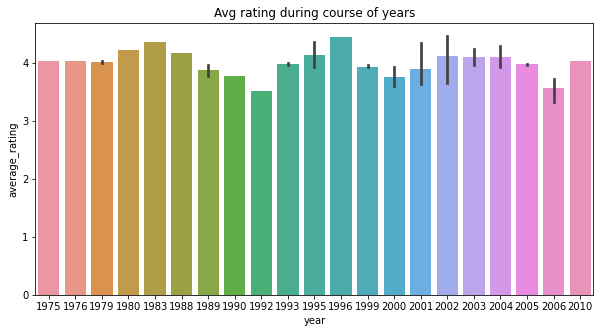

In [31]:
# distribution of ratings along the years for stephen king
aut_stephen=df[df['authors']=='Stephen King']
plt.figure(figsize=(10,5))
sns.barplot(x=aut_stephen['year'].sort_values(), y=aut_stephen['average_rating'])
plt.title('Avg rating during course of years')

Text(0.5, 1.0, 'Avg rating during course of years')

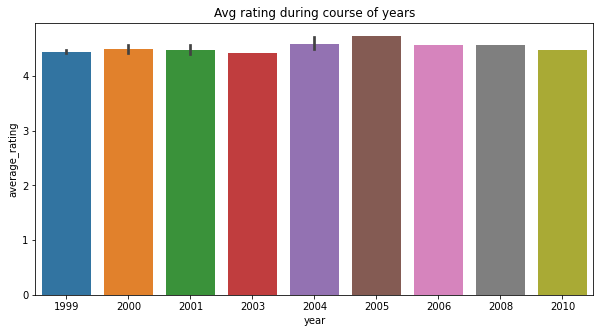

In [32]:
# distribution of ratings along the years for J.K. Rowling
aut_rowling=df[df['authors']=='J.K. Rowling']
plt.figure(figsize=(10,5))
sns.barplot(x=aut_rowling['year'].sort_values(), y=aut_rowling['average_rating'])
plt.title('Avg rating during course of years')

Text(0.5, 1.0, 'Avg rating during course of years')

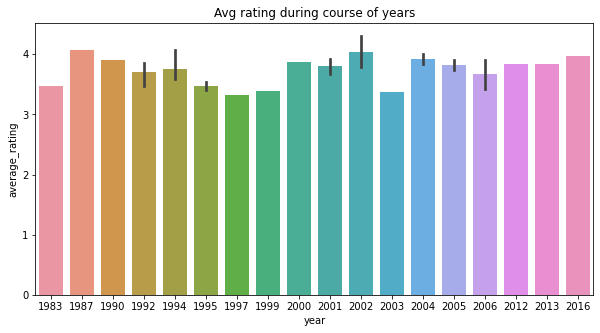

In [33]:
# distribution of ratings along the years for Orson Scott Card 
aut_orson=df[df['authors']=='Orson Scott Card']
plt.figure(figsize=(10,5))
sns.barplot(x=aut_orson['year'].sort_values(), y=aut_orson['average_rating'])
plt.title('Avg rating during course of years')

Text(0.5, 1.0, 'Avg rating during course of years')

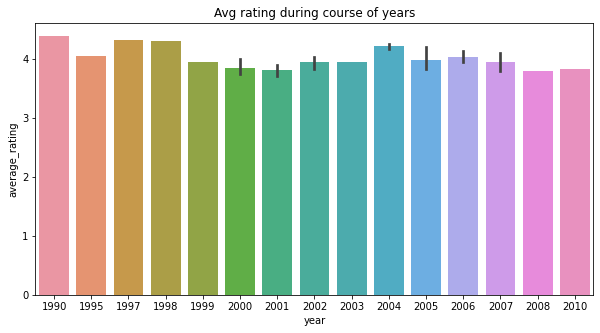

In [34]:
# distribution of ratings along the years for Agatha Christie
aut_agatha=df[df['authors']=='Agatha Christie']
plt.figure(figsize=(10,5))
sns.barplot(x=aut_agatha['year'].sort_values(), y=aut_agatha['average_rating'])
plt.title('Avg rating during course of years')

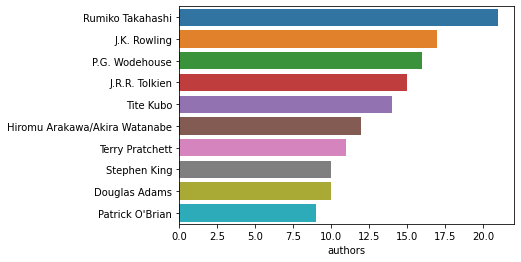

In [35]:
# top 10 rated authors with number of books
most_rated_author=df[df['average_rating']>=4.2]
most_rated_author=most_rated_author['authors'].value_counts()[:10]
most_rated_author
sns.barplot(x=most_rated_author,y=most_rated_author.index)

In [36]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


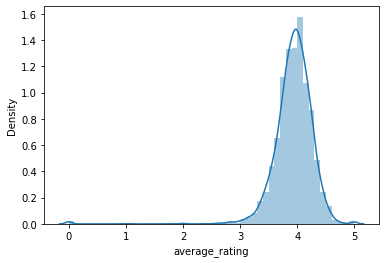

In [37]:
# distribution of avg rating 
sns.distplot(df['average_rating'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


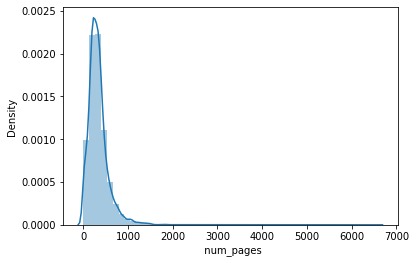

In [38]:
# distribution of number of pages
sns.distplot(df['  num_pages'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


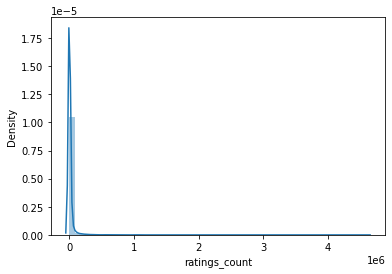

In [39]:
# distribution of ratings_count
sns.distplot(df['ratings_count'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


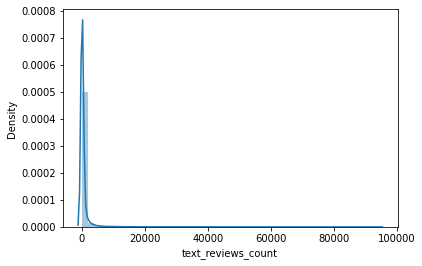

In [40]:
# distribution of text_reviews_count
sns.distplot(df['text_reviews_count'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


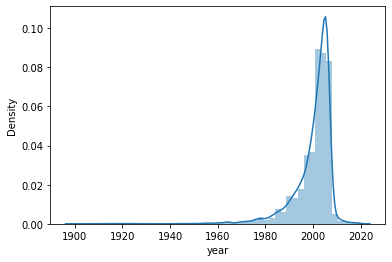

In [41]:
# distribution of year
sns.distplot(df['year'])

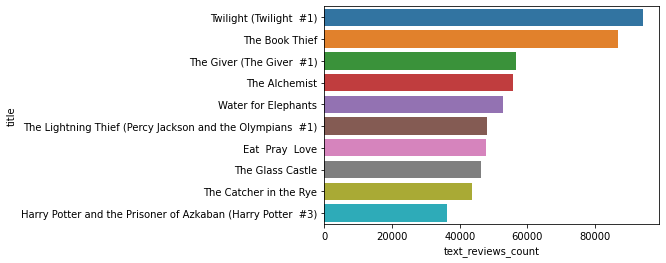

In [42]:
# books with highest rivews
highest_reviews=df.sort_values('text_reviews_count', ascending=False).set_index('title')[:10]
highest_reviews
sns.barplot(x=highest_reviews['text_reviews_count'],y=highest_reviews.index)

In [43]:
df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003


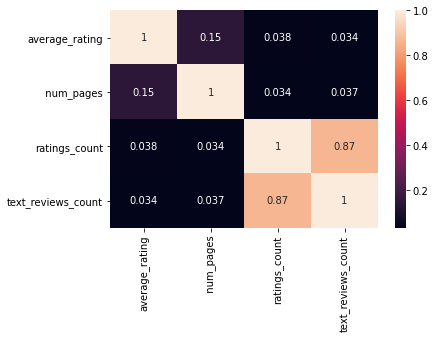

In [44]:
sns.heatmap(df.corr(), annot=True)

In [45]:
# function for rating

def rate(x):
  x=float(x)
  if (0<=x<1):
    return 'between 0 and 1'
  elif (1<=x<2):
    return 'between 1 and 2'
  elif (2<=x<3):
    return 'between 2 and 3'
  elif (3<=x<4):
    return 'between 3 and 4'
  elif (4<=x<=5):
    return'between 4 and 5'
  else:
    return 'beyond world'

In [46]:
df['rating_cat']=df['average_rating'].apply(rate)
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,rating_cat
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003,between 4 and 5
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,between 4 and 5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004,between 4 and 5


In [47]:
# rating percetage
rating_pct=df['rating_cat'].value_counts()/len(df)*100
rating_pct

between 3 and 4    54.706464
between 4 and 5    44.538344
between 2 and 3     0.503461
between 0 and 1     0.224760
between 1 and 2     0.026971
Name: rating_cat, dtype: float64

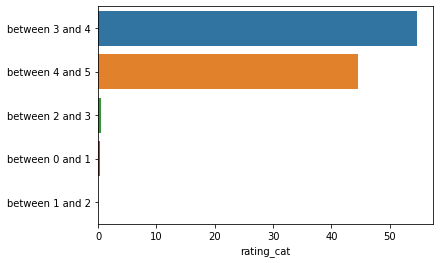

In [48]:
sns.barplot(x=rating_pct, y=rating_pct.index)

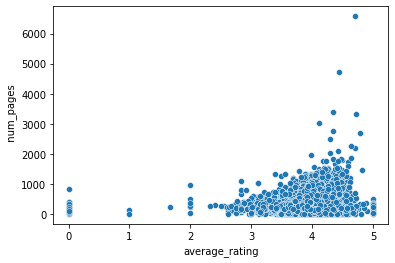

In [49]:
# relation between abg rating and number of pages
sns.scatterplot(x=df['average_rating'], y=df['  num_pages'], data=df)

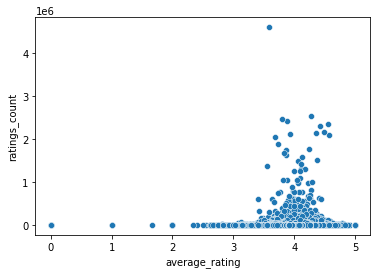

In [50]:
# relation between avg rating and ratings_count
sns.scatterplot(x=df['average_rating'], y=df['ratings_count'], data=df)

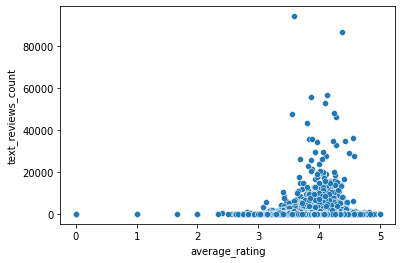

In [51]:
# relation between avg rating and text_reviews_count
sns.scatterplot(x=df['average_rating'], y=df['text_reviews_count'], data=df)

In [52]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_cat'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

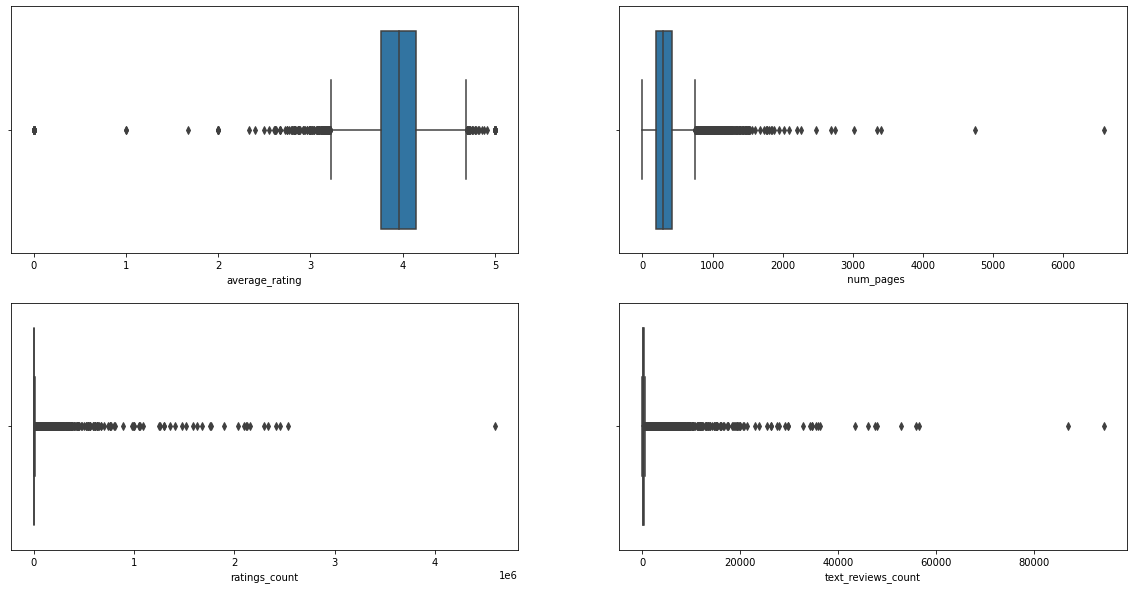

In [53]:
# boxplot for outliers
num_cols=['average_rating','  num_pages','ratings_count','text_reviews_count']
fig, axes=plt.subplots(2,2, figsize=(20,10))

for i,j in enumerate(num_cols):
  ax=axes[int(i/2), i%2]
  sns.boxplot(df[j], ax=ax)


In [54]:
df['year']=df['year'].astype('int')

In [55]:
df['year'].dtype

dtype('int64')

In [56]:
df_new=df.copy()

In [57]:
df_new.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,rating_cat
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003,between 4 and 5
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,between 4 and 5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004,between 4 and 5


In [58]:
# predictions

In [59]:
#feature engineering
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [60]:
# dummy variables
auth=pd.get_dummies(df_new[['authors']])
tit=pd.get_dummies(df_new[['title']])
lang=pd.get_dummies(df_new[['language_code']])
pub=pd.get_dummies(df_new[['publisher']])
years=pd.get_dummies(df_new[['year']])
rat_cat=pd.get_dummies(df_new[['rating_cat']])

In [61]:
df_new=pd.concat([df_new,auth,tit,lang,pub,years,rat_cat], axis=1)

In [62]:
df_new.drop(['title','authors','language_code','publication_date','publisher','year','rating_cat'], axis=1, inplace=True)

In [63]:
df_new.head(1)

,average_rating,num_pages,ratings_count,text_reviews_count,authors_A.B. Yehoshua/Hillel Halkin,authors_A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,authors_A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,authors_A.J. Jacobs,authors_A.M. Homes,authors_A.N. Roquelaure/Anne Rice,authors_A.S. Byatt,authors_Abbie Hoffman/Anita Hoffman,authors_Abdul Rahman Munif/Peter Theroux,authors_Abigail Adams/Frank Shuffelton,authors_Abigail Thomas,authors_Abolqasem Ferdowsi/Dick Davis/Azar Nafisi,authors_Abraham Lincoln/Bob Blaisdell,authors_Abraham Lincoln/Don E. Fehrenbacher,authors_Abraham Lincoln/Gore Vidal,authors_Abraham Lincoln/Michael McCurdy,authors_Adam Sexton/G. Tubach,authors_Adam Drozdek,authors_Adam Ginsberg,authors_Adam Gopnik,authors_Adam Gopnik/Omar Rayyan,authors_Adam Hochschild,authors_Adam Mansbach,authors_Adam Rex,authors_Adam Smith,authors_Adam Smith/Robert B. Reich,authors_Adam Swift,authors_Adam Woog,authors_Adolfo Bioy Casares,authors_Adrian Guelke/Michael Cox/Fiona Stephen,authors_Adrian McKinty,authors_Adèle Geras/Shelagh McNicholas/Adèle Geras,authors_Aeschylus/Alan Shapiro/Peter H. Burian,authors_Aeschylus/David Grene/Richmond Lattimore,authors_Aeschylus/David Grene/Richmond Lattimore/Seth Benardete,authors_Aeschylus/David R. Slavitt/Smith Palmer Bovie,...,publisher_Yoruba Theological Archministry,publisher_Yosemite Conservancy,publisher_Young Picador,publisher_YoungJin Singapore Pte. Ltd.,publisher_Your Coach Digital,publisher_Zebra,publisher_Zebra Books,publisher_Zenith Press,publisher_Zeta Bolsillo,publisher_Zondervan,publisher_Zondervan Publishing Company,publisher_Zondervan Publishing House,publisher_btb,publisher_dtv,publisher_iBooks,publisher_iUniverse,publisher_l'ecole des loisirs,publisher_rbooks,publisher_Éditions 10/18,publisher_Éditions de L'Olivier,publisher_Éditions de Minuit,publisher_Éditions du Rocher,publisher_Эксмо,publisher_ガンガンコミックス,publisher_ビブロス,publisher_小学館,publisher_小学館 [Shōgakukan],publisher_時報出版,publisher_東立,publisher_皇冠文化出版有限公司,publisher_聯經出版事業股份有限公司,publisher_英文漢聲出版股份有限公司,publisher_角川書店 (Kadokawa Shoten),publisher_講談社,publisher_集英社,rating_cat_between 0 and 1,rating_cat_between 1 and 2,rating_cat_between 2 and 3,rating_cat_between 3 and 4,rating_cat_between 4 and 5
0,4.57,652,2095690,27591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
y=df_new['average_rating']
X=df_new.drop('average_rating',1)

In [65]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_cat'],
      dtype='object')

In [66]:
new_col=['  num_pages','ratings_count', 'text_reviews_count']
X[new_col]=scaler.fit_transform(X[new_col])
X.head()

,num_pages,ratings_count,text_reviews_count,authors_A.B. Yehoshua/Hillel Halkin,authors_A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,authors_A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,authors_A.J. Jacobs,authors_A.M. Homes,authors_A.N. Roquelaure/Anne Rice,authors_A.S. Byatt,authors_Abbie Hoffman/Anita Hoffman,authors_Abdul Rahman Munif/Peter Theroux,authors_Abigail Adams/Frank Shuffelton,authors_Abigail Thomas,authors_Abolqasem Ferdowsi/Dick Davis/Azar Nafisi,authors_Abraham Lincoln/Bob Blaisdell,authors_Abraham Lincoln/Don E. Fehrenbacher,authors_Abraham Lincoln/Gore Vidal,authors_Abraham Lincoln/Michael McCurdy,authors_Adam Sexton/G. Tubach,authors_Adam Drozdek,authors_Adam Ginsberg,authors_Adam Gopnik,authors_Adam Gopnik/Omar Rayyan,authors_Adam Hochschild,authors_Adam Mansbach,authors_Adam Rex,authors_Adam Smith,authors_Adam Smith/Robert B. Reich,authors_Adam Swift,authors_Adam Woog,authors_Adolfo Bioy Casares,authors_Adrian Guelke/Michael Cox/Fiona Stephen,authors_Adrian McKinty,authors_Adèle Geras/Shelagh McNicholas/Adèle Geras,authors_Aeschylus/Alan Shapiro/Peter H. Burian,authors_Aeschylus/David Grene/Richmond Lattimore,authors_Aeschylus/David Grene/Richmond Lattimore/Seth Benardete,authors_Aeschylus/David R. Slavitt/Smith Palmer Bovie,authors_Aeschylus/Denys L. Page,...,publisher_Yoruba Theological Archministry,publisher_Yosemite Conservancy,publisher_Young Picador,publisher_YoungJin Singapore Pte. Ltd.,publisher_Your Coach Digital,publisher_Zebra,publisher_Zebra Books,publisher_Zenith Press,publisher_Zeta Bolsillo,publisher_Zondervan,publisher_Zondervan Publishing Company,publisher_Zondervan Publishing House,publisher_btb,publisher_dtv,publisher_iBooks,publisher_iUniverse,publisher_l'ecole des loisirs,publisher_rbooks,publisher_Éditions 10/18,publisher_Éditions de L'Olivier,publisher_Éditions de Minuit,publisher_Éditions du Rocher,publisher_Эксмо,publisher_ガンガンコミックス,publisher_ビブロス,publisher_小学館,publisher_小学館 [Shōgakukan],publisher_時報出版,publisher_東立,publisher_皇冠文化出版有限公司,publisher_聯經出版事業股份有限公司,publisher_英文漢聲出版股份有限公司,publisher_角川書店 (Kadokawa Shoten),publisher_講談社,publisher_集英社,rating_cat_between 0 and 1,rating_cat_between 1 and 2,rating_cat_between 2 and 3,rating_cat_between 3 and 4,rating_cat_between 4 and 5
0,1.308751,18.469833,10.498316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.212783,18.980766,11.130957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.064669,-0.103204,-0.115679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.408865,20.637902,13.888182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.760210,0.208768,-0.146729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [68]:
'''lr.fit(X_train,y_train)
score_lr=lr.score(X_test,y_test)
print(score_lr)'''

'lr.fit(X_train,y_train)\nscore_lr=lr.score(X_test,y_test)\nprint(score_lr)'

In [69]:
'''# random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
score_rf=rf.score(X_test,y_test)
print(score_rf)'''

'# random forest\nfrom sklearn.ensemble import RandomForestRegressor\nrf=RandomForestRegressor()\nrf.fit(X_train,y_train)\nscore_rf=rf.score(X_test,y_test)\nprint(score_rf)'

In [70]:
# recommendation system

In [71]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,rating_cat
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003,between 4 and 5
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,between 4 and 5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004,between 4 and 5


In [72]:
df_rec=df.copy()

In [73]:
rating_rec=pd.get_dummies(df_rec['rating_cat'])
rating_rec.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [75]:
lang_rec=pd.get_dummies(df_rec['language_code'])
lang_rec.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
rec_features=pd.concat([rating_rec,lang_rec, df_rec['average_rating'],df_rec['ratings_count'],df_rec['text_reviews_count']], axis=1)
rec_features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count,text_reviews_count
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.57,2095690,27591
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.49,2153167,29221
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,6333,244
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.56,2339585,36325
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.78,41428,164


In [78]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [81]:
rec_features=mm.fit_transform(rec_features)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.14000000e-01, 4.55816060e-01, 2.92696123e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.98000000e-01, 4.68317403e-01, 3.09987800e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.84000000e-01, 1.37743803e-03, 2.58844746e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.92000000e-01, 1.78351363e-04, 1.00779717e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.44000000e-01, 1.67258779e-04, 1.47456638e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.82000000e-01, 2.45776879e-05, 1.27300695e-04]])

In [84]:
# kmeans
from sklearn.cluster import KMeans
g=[]
x=rec_features
for i in range(1,20):
  k_means = KMeans(n_clusters = i, init="k-means++", random_state=42)
  k_means.fit(x)
  g.append(k_means.inertia_) 


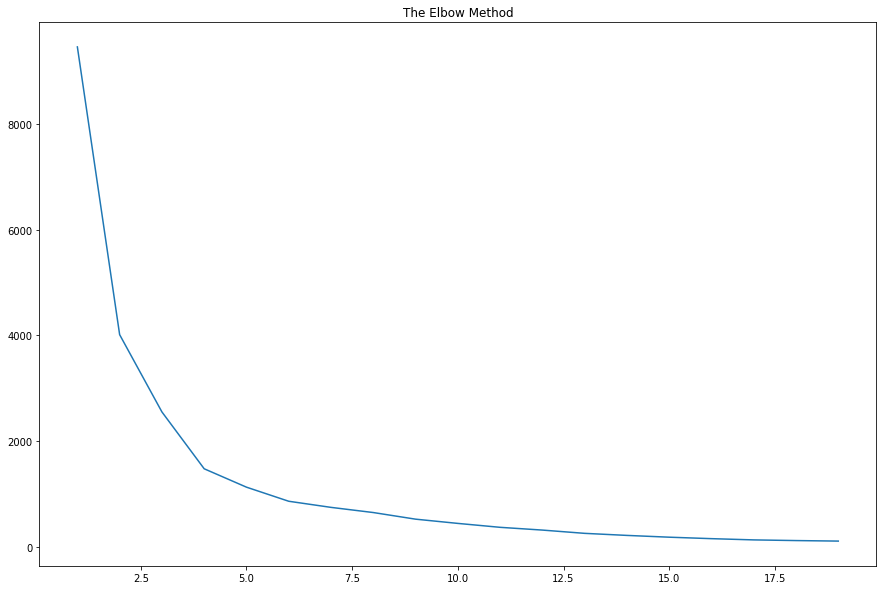

In [85]:
# ploting elbow
plt.figure(figsize=(15, 10))
plt.plot(range(1,20), g)
plt.title('The Elbow Method')
plt.show()

In [86]:
# KNN

In [87]:
from sklearn.neighbors import NearestNeighbors
clf=NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
clf.fit(rec_features)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [88]:
distance,id=clf.kneighbors(rec_features)

In [89]:
def rec_system(name):
    book_name = []
    book_id = df_rec[df_rec['title'] == name].index
    book_id = book_id[0]
#     print('book_id', book_id)
    for newid in id[book_id]:
#         print(newid)
        book_name.append(df_rec.loc[newid].title)
#         print(new_data.loc[newid].title)
    return book_name

In [93]:
rec_system('In a Sunburned Country')

['In a Sunburned Country',
 'Pope Joan',
 'Fun Home: A Family Tragicomic',
 'Travels with Charley: In Search of America',
 'Beauty: A Retelling of the Story of Beauty and the Beast',
 "The Color of Water: A Black Man's Tribute to His White Mother"]